In [1]:
!pip install matplotlib
!pip install seaborn
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
def rmse(df):
    ratings = df["rating"].to_numpy()
    preds = df["preds"].to_numpy()
    return mean_squared_error(ratings, preds, squared=False)

In [3]:
model_preds = {
    "dlrm_ep=1": pd.read_csv("merlin_dlrm_preds.csv"),
    "dlrm_ep=5": pd.read_csv("merlin_dlrm2_preds.csv"),
    "dlrm_ep=1,l2": pd.read_csv("merlin_dlrm3_preds.csv"),
    "dlrm_ep=5,l2": pd.read_csv("merlin_dlrm4_preds.csv"),
    "xgbr": pd.read_csv("xgbr_preds.csv"),
    "item_average": pd.read_csv("average_preds.csv"),
}

ratings = list(model_preds.values())[0].to_numpy()
raw_preds = {
    name: df["preds"].to_numpy() for name, df in model_preds.items()
}

model_rmses = {
    name: rmse(df) for name, df in model_preds.items()
}

In [4]:
for model_name, rmse in model_rmses.items():
    print(f"{model_name} RMSE: {rmse}")

dlrm_ep=1 RMSE: 1.1450887195959811
dlrm_ep=5 RMSE: 1.1147216541642466
dlrm_ep=1,l2 RMSE: 1.110714334514003
dlrm_ep=5,l2 RMSE: 1.1107888572003648
xgbr RMSE: 0.9878193577715882
item_average RMSE: 0.9587433473210412


<BarContainer object of 6 artists>

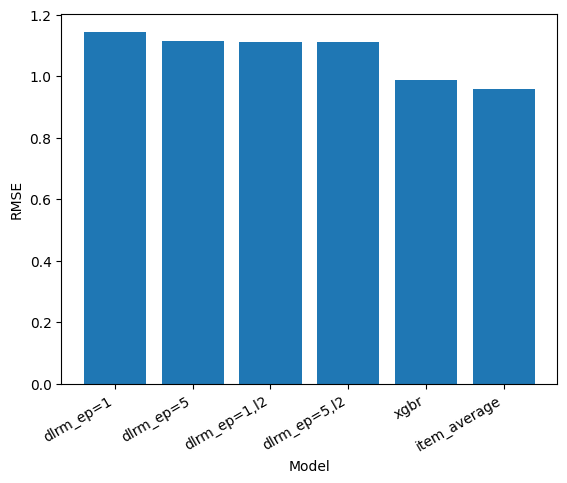

In [5]:
data = model_rmses.values()
columns = model_rmses.keys()
fig = plt.figure()
plt.xlabel("Model")
plt.xticks(rotation=30, ha='right')
plt.ylabel("RMSE")
plt.bar(columns, data)

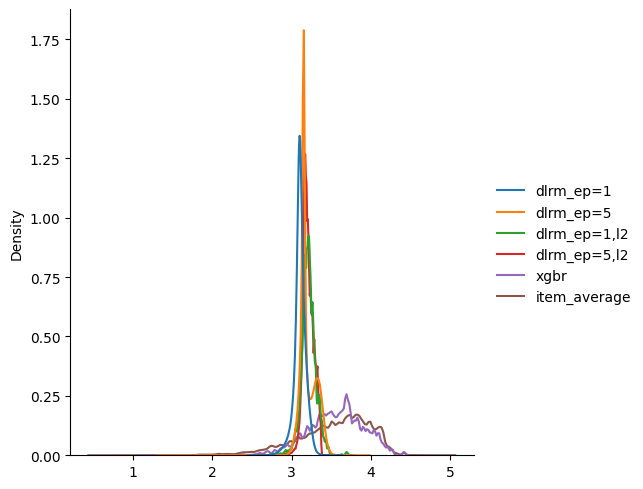

In [6]:
sns.displot(raw_preds, kind="kde")